In [36]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [37]:
raw_data = pd.read_csv('testing_guesses.csv')
print(raw_data.columns)
raw_data.columns = ['player', 'guess']

Index(['Player', 'Guess'], dtype='object')


In [49]:
data = raw_data[(raw_data.guess != '-') & (pd.notnull(raw_data.guess))]

In [50]:
data.head()

,player,guess
0,Jerry Bentall,22/05/2020 02:04:00
1,Tom Bentall,24/05/2020 13:44:00
2,Richard Bridge,24/05/2020 06:15:00
3,Jess Fermor,19/05/2020 14:55:00
4,Phil Collins,25/05/2020 12:00:00


In [53]:
data.loc[:,"guess"] = pd.to_datetime(data.loc[:,"guess"], format="%d/%m/%Y %H:%M:%S")
data.loc[:, "guess_rank"] = data.rank().guess.astype(int)
data.sort_values("guess_rank")

/Users/willcanniford/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,player,guess,guess_rank
14,Sean Ashfield,2020-05-14 17:00:00,1
11,Elin Bentall,2020-05-16 00:03:00,2
13,Joe Austin,2020-05-16 16:16:00,3
26,Chris Langman,2020-05-17 09:12:00,4
17,Miles Partridge,2020-05-17 11:11:00,5
20,Tahirih McLaren-Brown,2020-05-18 01:00:00,6
28,Andy Brittain,2020-05-18 05:12:00,7
19,Val Partridge,2020-05-18 22:23:00,8
5,Matt Bentall,2020-05-18 23:34:00,9
3,Jess Fermor,2020-05-19 14:55:00,10


In [54]:
def find_midpoint(guess_1, guess_2):
    return(guess_1 + (guess_2 - guess_1)/2)

In [55]:
first = data[data.guess_rank == 1].guess.values
second = data[data.guess_rank == 2].guess.values

In [56]:
find_midpoint(first, second)

array(['2020-05-15T08:31:30.000000000'], dtype='datetime64[ns]')

In [57]:
boundaries = pd.DataFrame()

for i in range(1, data.shape[0] + 1):
    if i != 1 and i != data.shape[0]:
        idx_1 = data[data.guess_rank == i - 1].guess.values
        idx_2 = data[data.guess_rank == i].guess.values 
        idx_3 = data[data.guess_rank == i + 1].guess.values
        lower = find_midpoint(idx_1, idx_2)
        upper = find_midpoint(idx_2, idx_3)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower, 'upper':upper})
        boundaries = pd.concat([boundaries,iteration], ignore_index=True)
    elif i == data.shape[0]:
        idx_1 = data[data.guess_rank == i - 1].guess.values
        idx_2 = data[data.guess_rank == i].guess.values 
        lower = find_midpoint(idx_1, idx_2)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower})
        boundaries = pd.concat([boundaries,iteration], ignore_index=True)
    else:
        idx_2 = data[data.guess_rank == i].guess.values 
        idx_3 = data[data.guess_rank == i + 1].guess.values
        upper = find_midpoint(idx_2, idx_3)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'upper':upper})
        boundaries = pd.concat([boundaries,iteration], ignore_index=True)

In [58]:
joined = data.set_index('guess_rank').join(boundaries.set_index('guess_rank'), rsuffix='_r').sort_index()
joined.loc[:, ['player','guess','lower','upper']]

,player,guess,lower,upper
guess_rank,,,,
1,Sean Ashfield,2020-05-14 17:00:00,NaT,2020-05-15 08:31:30
2,Elin Bentall,2020-05-16 00:03:00,2020-05-15 08:31:30,2020-05-16 08:09:30
3,Joe Austin,2020-05-16 16:16:00,2020-05-16 08:09:30,2020-05-17 00:44:00
4,Chris Langman,2020-05-17 09:12:00,2020-05-17 00:44:00,2020-05-17 10:11:30
5,Miles Partridge,2020-05-17 11:11:00,2020-05-17 10:11:30,2020-05-17 18:05:30
6,Tahirih McLaren-Brown,2020-05-18 01:00:00,2020-05-17 18:05:30,2020-05-18 03:06:00
7,Andy Brittain,2020-05-18 05:12:00,2020-05-18 03:06:00,2020-05-18 13:47:30
8,Val Partridge,2020-05-18 22:23:00,2020-05-18 13:47:30,2020-05-18 22:58:30
9,Matt Bentall,2020-05-18 23:34:00,2020-05-18 22:58:30,2020-05-19 07:14:30


In [66]:
joined["total_range"] = joined.upper - joined.lower
joined.sort_values('total_range')

,player,guess,guess_r,upper,lower,total_range
guess_rank,,,,,,
14,Jerry Bentall,2020-05-22 02:04:00,2020-05-22 02:04:00,2020-05-22 03:20:00,2020-05-21 20:47:00,0 days 06:33:00
21,Keith Alexander,2020-05-28 06:00:00,2020-05-28 06:00:00,2020-05-28 10:30:00,2020-05-28 03:34:30,0 days 06:55:30
5,Miles Partridge,2020-05-17 11:11:00,2020-05-17 11:11:00,2020-05-17 18:05:30,2020-05-17 10:11:30,0 days 07:54:00
9,Matt Bentall,2020-05-18 23:34:00,2020-05-18 23:34:00,2020-05-19 07:14:30,2020-05-18 22:58:30,0 days 08:16:00
13,Chris Partridge,2020-05-21 15:30:00,2020-05-21 15:30:00,2020-05-21 20:47:00,2020-05-21 12:21:00,0 days 08:26:00
10,Jess Fermor,2020-05-19 14:55:00,2020-05-19 14:55:00,2020-05-19 15:42:30,2020-05-19 07:14:30,0 days 08:28:00
6,Tahirih McLaren-Brown,2020-05-18 01:00:00,2020-05-18 01:00:00,2020-05-18 03:06:00,2020-05-17 18:05:30,0 days 09:00:30
8,Val Partridge,2020-05-18 22:23:00,2020-05-18 22:23:00,2020-05-18 22:58:30,2020-05-18 13:47:30,0 days 09:11:00
4,Chris Langman,2020-05-17 09:12:00,2020-05-17 09:12:00,2020-05-17 10:11:30,2020-05-17 00:44:00,0 days 09:27:30


In [65]:
joined

,player,guess,guess_r,upper,lower
guess_rank,,,,,
1,Sean Ashfield,2020-05-14 17:00:00,2020-05-14 17:00:00,2020-05-15 08:31:30,NaT
2,Elin Bentall,2020-05-16 00:03:00,2020-05-16 00:03:00,2020-05-16 08:09:30,2020-05-15 08:31:30
3,Joe Austin,2020-05-16 16:16:00,2020-05-16 16:16:00,2020-05-17 00:44:00,2020-05-16 08:09:30
4,Chris Langman,2020-05-17 09:12:00,2020-05-17 09:12:00,2020-05-17 10:11:30,2020-05-17 00:44:00
5,Miles Partridge,2020-05-17 11:11:00,2020-05-17 11:11:00,2020-05-17 18:05:30,2020-05-17 10:11:30
6,Tahirih McLaren-Brown,2020-05-18 01:00:00,2020-05-18 01:00:00,2020-05-18 03:06:00,2020-05-17 18:05:30
7,Andy Brittain,2020-05-18 05:12:00,2020-05-18 05:12:00,2020-05-18 13:47:30,2020-05-18 03:06:00
8,Val Partridge,2020-05-18 22:23:00,2020-05-18 22:23:00,2020-05-18 22:58:30,2020-05-18 13:47:30
9,Matt Bentall,2020-05-18 23:34:00,2020-05-18 23:34:00,2020-05-19 07:14:30,2020-05-18 22:58:30


In [59]:
colors = ['r','g','b']

In [70]:
np.repeat(0.95,joined.shape[0])

array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95])

In [67]:
joined.shape

(26, 6)

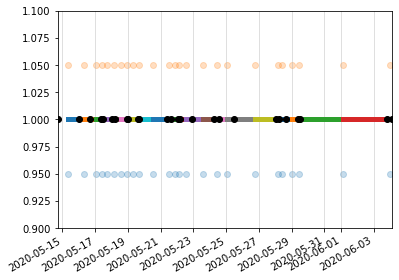

In [74]:
#plt.scatter(joined.guess, [1,1,1,1,1])
plt.scatter(joined.lower, np.repeat(0.95,joined.shape[0]), alpha=0.25)
plt.scatter(joined.upper, np.repeat(1.05,joined.shape[0]), alpha=0.25)
plt.xlim([joined.guess.min(), joined.guess.max()])
plt.ylim([0.9,1.1])

for index, i in enumerate(range(2, joined.shape[0])):
    lower = joined.loc[i, :].lower
    upper = joined.loc[i, :].upper
    plt.plot([lower, upper], [1,1], linewidth = 5)
    
plt.scatter(joined.guess, np.repeat(1,joined.shape[0]), color='black', zorder=100)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='x', alpha=0.5, which='major')
#plt.plot([joined.guess.min(), joined.guess.max()], [0.95, 1.05], color='r', linewidth = 5)
plt.show()

In [75]:
joined.head()

,player,guess,guess_r,upper,lower,total_range
guess_rank,,,,,,
1,Sean Ashfield,2020-05-14 17:00:00,2020-05-14 17:00:00,2020-05-15 08:31:30,NaT,NaT
2,Elin Bentall,2020-05-16 00:03:00,2020-05-16 00:03:00,2020-05-16 08:09:30,2020-05-15 08:31:30,23:38:00
3,Joe Austin,2020-05-16 16:16:00,2020-05-16 16:16:00,2020-05-17 00:44:00,2020-05-16 08:09:30,16:34:30
4,Chris Langman,2020-05-17 09:12:00,2020-05-17 09:12:00,2020-05-17 10:11:30,2020-05-17 00:44:00,09:27:30
5,Miles Partridge,2020-05-17 11:11:00,2020-05-17 11:11:00,2020-05-17 18:05:30,2020-05-17 10:11:30,07:54:00


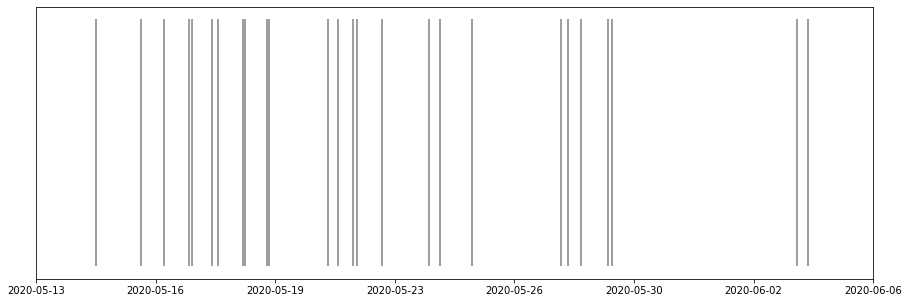

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
ax.vlines(joined.guess, ymin=1, ymax=2, alpha=0.5)
ax.set_yticks([])
ax.set_xticks(pd.date_range('2020-05-13', '2020-06-06', 8))
plt.show()